<a id="2"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#083069;overflow:hidden"><b>Loan Default Prediction - Data Science Entry Level Test</b></div>

<div style="display:flex;justify-content:center;">
<img src="https://previews.123rf.com/images/turhanyalcin/turhanyalcin1204/turhanyalcin120400004/13323911-stamp-printed-on-the-approved-loan-application-approved.jpg"
style="width:600px;height:600px;" />
</div>

<a id="1.1"></a>
<h2 style="font-family: Georgia; font-size: 25px; font-style: normal; font-weight: normal; text-align:center; display:fill; text-decoration: none; padding:10px; letter-spacing: 2px; color: white; background-color:black;"><b>Challenge Objectives</h2>

<div style="font-family:Georgia;background-color:black; padding:30px; font-size:17px">

💡 In this project we will do binary classififcation on Loan Financial Data (Top Coder Challenge)<br>

💡The main aim of this project is use machine learning to create a model that predicts the likelihood of a customer defaulting on a loan using historical financial data.<br>
</div>

<a id="1.1"></a>
<h2 style="font-family: Georgia; font-size: 25px; font-style: normal; font-weight: normal; text-align:center; display:fill; text-decoration: none; padding:10px; letter-spacing: 2px; color: white; background-color:black;"><b>Importing Libraries</h2>

In [1]:
import pandas as pd
pd.set_option('display.max_columns',100)

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette("muted")
pd.set_option("display.max.rows",None)
pd.set_option("display.max.columns",None)

import warnings
warnings.filterwarnings('ignore')

from scipy import stats as st
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

<a id="1.1"></a>
<h2 style="font-family: Georgia; font-size: 25px; font-style: normal; font-weight: normal; text-align:center; display:fill; text-decoration: none; padding:10px; letter-spacing: 2px; color: white; background-color:black;"><b>Loading Datasets</h2>

In [2]:
data_df = pd.read_csv('Financial_data.csv')
data_df.head(10)

,Customer ID,Annual income,Credit score,Employment length,Debt-to-income ratio,Loan default
0,1,"$65,000",680,2 years,0.24,0.0
1,2,"$40,000",590,1 year,0.37,1.0
2,3,"$95,000",720,5 years,0.16,0.0
3,4,"$35,000",530,6 months,0.50,1.0
4,5,"$80,000",710,4 years,0.27,0.0
5,6,"$55,000",650,3 years,0.32,0.0
6,7,"$100,000",750,6 years,0.15,0.0
7,8,"$45,000",600,1 year,0.42,1.0
8,9,"$110,000",790,7 years,0.12,0.0
9,10,"$75,000",700,3 years,0.28,0.0


<a id="1.1"></a>
<h2 style="font-family: Georgia; font-size: 25px; font-style: normal; font-weight: normal; text-align:center; display:fill; text-decoration: none; padding:10px; letter-spacing: 2px; color: white; background-color:black;"><b>Data Fields </h2>

> * **Customer ID:** This feature indicates the Id of each customer.
> * **Annual income:** The self-reported annual income provided by the customer during registration. 
> * **Credit score:** This is  a prediction of your credit behavior, such as how likely you are to pay a loan back on time, based on information from your credit reports.
> * **Employment length:** This feature indicates employment length in years and months.
> * **Debt-to-income-ratio:** Asuuming this is a ratio calculated using the customers’s total debt, divided by the customers’s self-reported income.
> * **Loan default:**  binary indicator of whether the customer defaulted. **0 means Not- Defaulted** & **1 means Defaulted**


<a id="1.1"></a>
<h2 style="font-family: Georgia; font-size: 25px; font-style: normal; font-weight: normal; text-align:center; display:fill; text-decoration: none; padding:10px; letter-spacing: 2px; color: white; background-color:black;"><b>Understanding & Cleaning Dataset </h2>

In [3]:
# To check the rows and columns of the dataframe
data_df.shape

(58, 6)

In [4]:
# To check data type and information of each column
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer ID           58 non-null     int64  
 1   Annual income         57 non-null     object 
 2   Credit score          58 non-null     int64  
 3   Employment length     57 non-null     object 
 4   Debt-to-income ratio  57 non-null     float64
 5   Loan default          57 non-null     float64
dtypes: float64(2), int64(2), object(2)
memory usage: 2.8+ KB


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer ID           58 non-null     int64  
 1   Annual income         57 non-null     object 
 2   Credit score          58 non-null     int64  
 3   Employment length     57 non-null     object 
 4   Debt-to-income ratio  57 non-null     float64
 5   Loan default          57 non-null     float64
dtypes: float64(2), int64(2), object(2)
memory usage: 2.8+ KB


In [6]:
# Descriptive statistical analysis of numerical features on the dataset
data_df.describe()

,Customer ID,Credit score,Debt-to-income ratio,Loan default
count,58.000000,58.000000,57.000000,57.000000
mean,29.500000,674.310345,0.296667,0.298246
std,16.886879,80.461652,0.116792,0.461555
min,1.000000,520.000000,0.110000,0.000000
25%,15.250000,610.000000,0.200000,0.000000
50%,29.500000,695.000000,0.280000,0.000000
75%,43.750000,730.000000,0.380000,1.000000
max,58.000000,800.000000,0.520000,1.000000


In [7]:
# To check for unique values in each column
data_df.nunique()

Customer ID             58
Annual income           23
Credit score            25
Employment length        8
Debt-to-income ratio    31
Loan default             2
dtype: int64

In [8]:
# Checks for duplicates in the dataset
data_df.duplicated().sum()

0

In [9]:
# To check for null values in the data from each of the columns
# Representing the missing values in percentage to have a clearer picture of the missing data
for column in data_df.columns:
    percent = data_df[column].isnull().mean()
    print(f'{column}:{round(percent*100, 2)}%')

Customer ID:0.0%
Annual income:1.72%
Credit score:0.0%
Employment length:1.72%
Debt-to-income ratio:1.72%
Loan default:1.72%


In [10]:
# Describe a function to remove null values and drop the customer ID column
def clean (data):
    #dropping unwanted columns
    data.drop(columns=["Customer ID"], inplace = True)

    #filling missing values in Age column
    data['Annual income'].fillna(data['Annual income'].mode()[0], inplace = True)
    
    #filling missing values in Employment length column
    data['Employment length'].fillna(data['Employment length'].mode()[0], inplace = True)

     #filling missing values in Debt-to-income column
    data['Debt-to-income ratio'].fillna(data['Debt-to-income ratio'].median(), inplace = True)
    
    #filling missing values in Loan default column
    data['Loan default'].fillna(data['Loan default'].median(), inplace = True)
    
    #asserting that there is no missing values left
    for col in data:
        assert data[col].isnull().sum() == 0
    
    return data

In [11]:
data_df = clean(data_df)
data_df.isnull().sum()

Annual income           0
Credit score            0
Employment length       0
Debt-to-income ratio    0
Loan default            0
dtype: int64

<a id="1.1"></a>
<h2 style="font-family: Georgia; font-size: 25px; font-style: normal; font-weight: normal; text-align:center; display:fill; text-decoration: none; padding:10px; letter-spacing: 2px; color: white; background-color:black;"><b>Exploratory Data Analysis  </h2>

##### Visualizing Target Variable -Loan Default

In [12]:
# Visualizing Target Variable -Loan Default
data_df["Loan default"].replace({0:"Not-Defaulted",1:"Defaulted"},inplace=True)
Pie = data_df["Loan default"].value_counts().to_frame()
Pie

,Loan default
Not-Defaulted,41
Defaulted,17


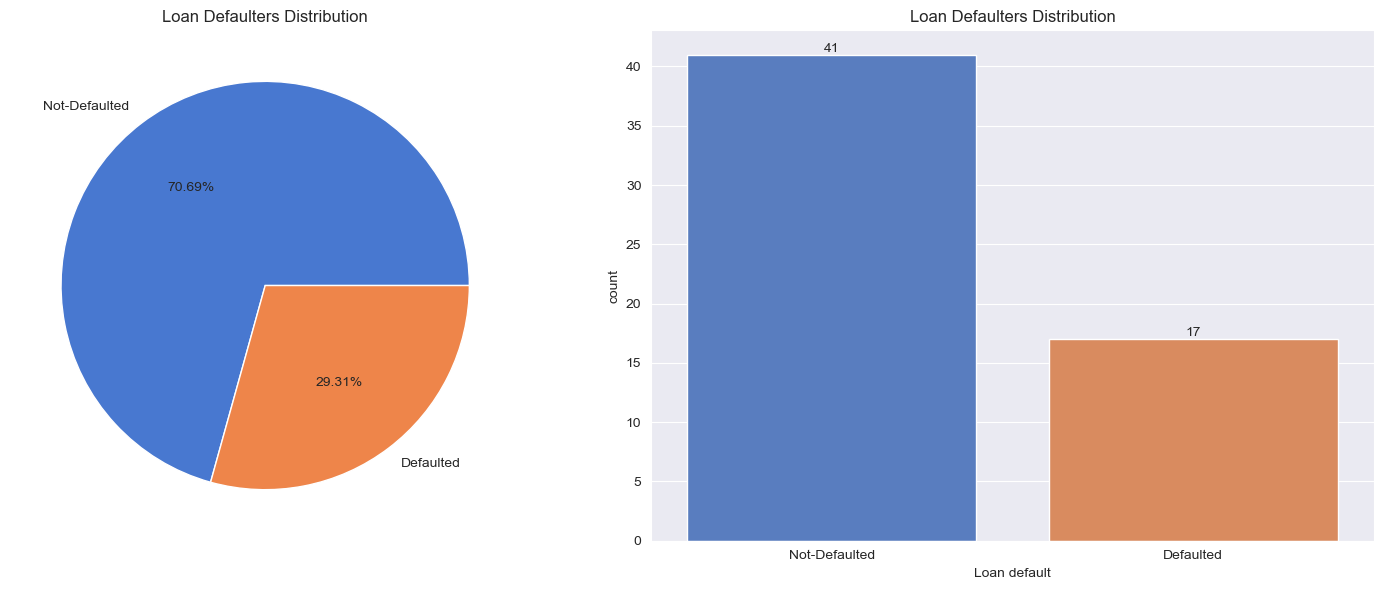

In [13]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.pie(Pie.values.ravel(),labels=Pie.index,autopct="%0.2f%%")
plt.title("Loan Defaulters Distribution")

plt.subplot(1,2,2)
ax = sns.countplot(x="Loan default",data=data_df)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Loan Defaulters Distribution")
plt.tight_layout()
plt.show()

<div style="font-family:Georgia;background-color:black; padding:30px; font-size:17px">

💡The number of customers who did not default on their loan respresent more than 70% of the data.<br>
</div>

##### Visualizing Feature Variable - Annual Income

In [14]:
# The Annual income column datatype states object, would like to change to integer
# using replace to slice each string entry by removing the '$' and ',' in Annual income column
data_df['Annual income'] = data_df['Annual income'].replace('[\$,]', '', regex=True).astype(int)

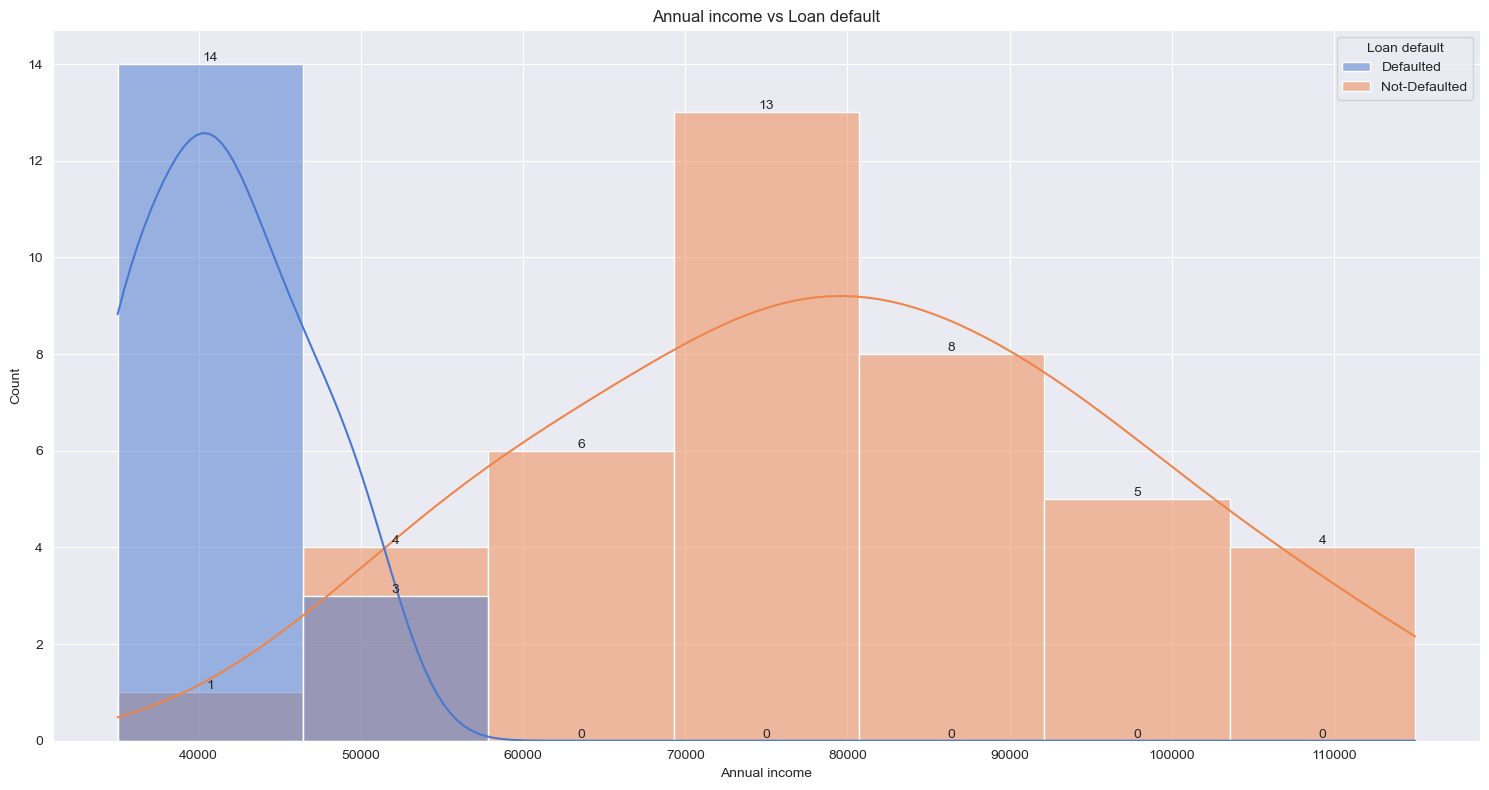

In [15]:
# Visualizing Feature Variable - Annual Income
plt.figure(figsize=(15,8))
ax = sns.histplot(x='Annual income', hue="Loan default", data=data_df.sort_values(by=['Annual income'],ascending=True), kde=True)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Annual income vs Loan default")
plt.tight_layout()
plt.show()

<div style="font-family:Georgia;background-color:black; padding:30px; font-size:17px">

💡The customers with Annual Income greater than $60,000, were less likely to default their Loans.<br>

💡We can observe that a number of customers earned less than $45,000 Annually.<br>
</div>

##### Visualizing Feature Variable -Credit Score

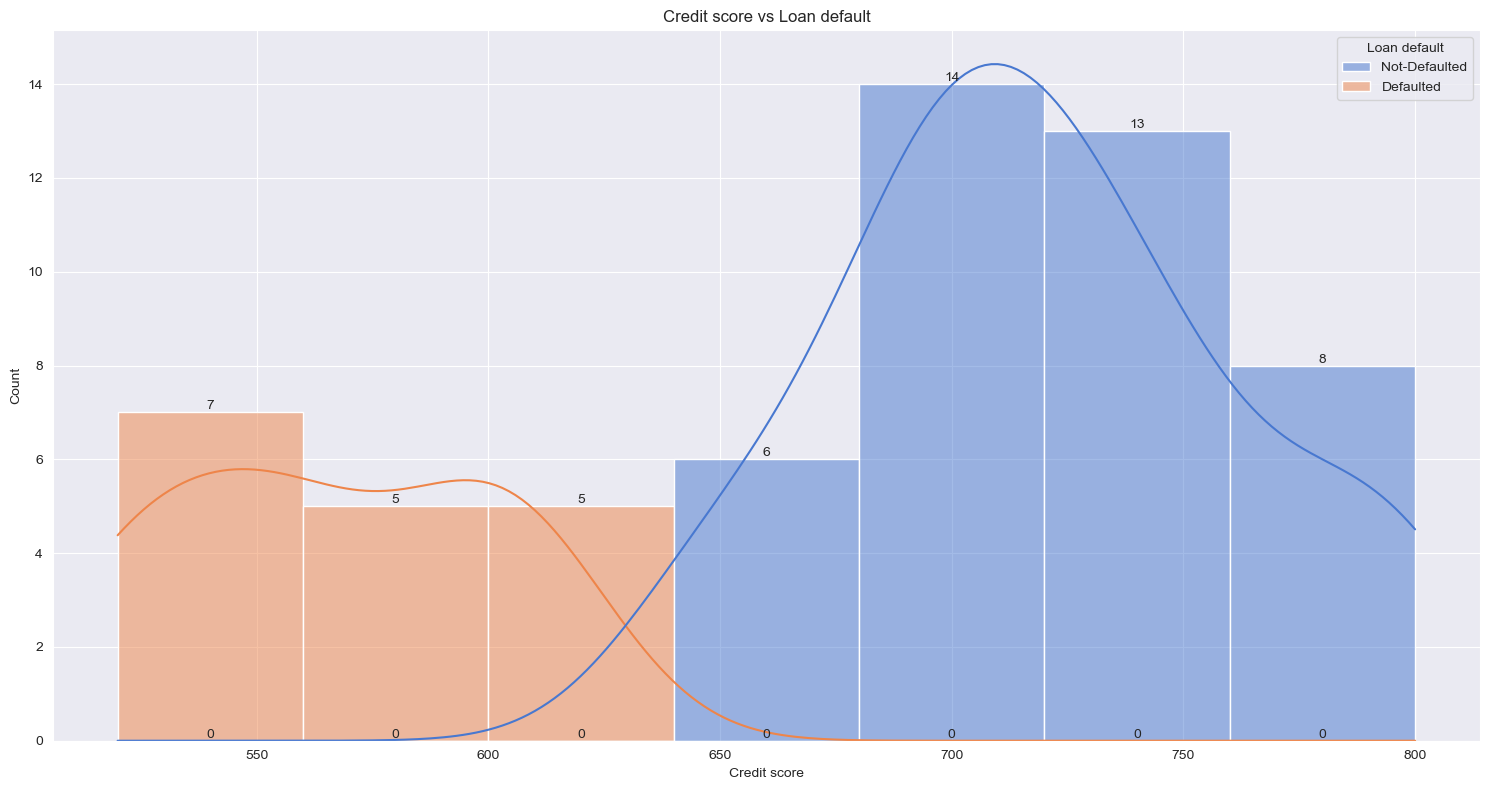

In [16]:
# Visualizing Feature Variable -Credit Score
plt.figure(figsize=(15,8))
ax = sns.histplot(x="Credit score", hue="Loan default", data=data_df, kde=True)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Credit score vs Loan default")
plt.tight_layout()
plt.show()

<div style="font-family:Georgia;background-color:black; padding:30px; font-size:17px">

💡The customers with Credit Score greater than 650 tend to not default on their loans.<br>
</div>

##### Visualizing Feature Variable - Employment Length

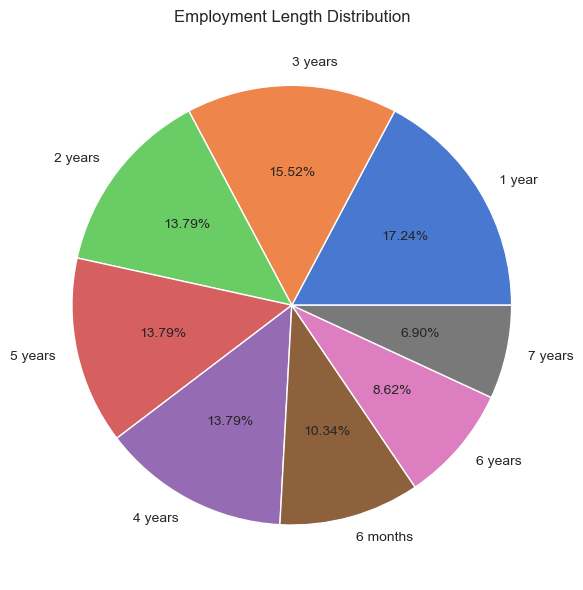

In [17]:
# Visualizing Feature Variable - Employment Length
Pie = data_df["Employment length"].value_counts().to_frame()
Pie

plt.figure(figsize=(15,6))
plt.pie(Pie.values.ravel(),labels=Pie.index,autopct="%0.2f%%")
plt.title("Employment Length Distribution")
plt.tight_layout()

<div style="font-family:Georgia;background-color:black; padding:30px; font-size:17px">

💡Most of the customers have an employment length of 1year.<br>

💡Fewer customers have more than 7 years of employment length.<br>

💡There are equal numbers f=of customers with 2 years, 4 years and 5 years of employment length.<br>
</div>

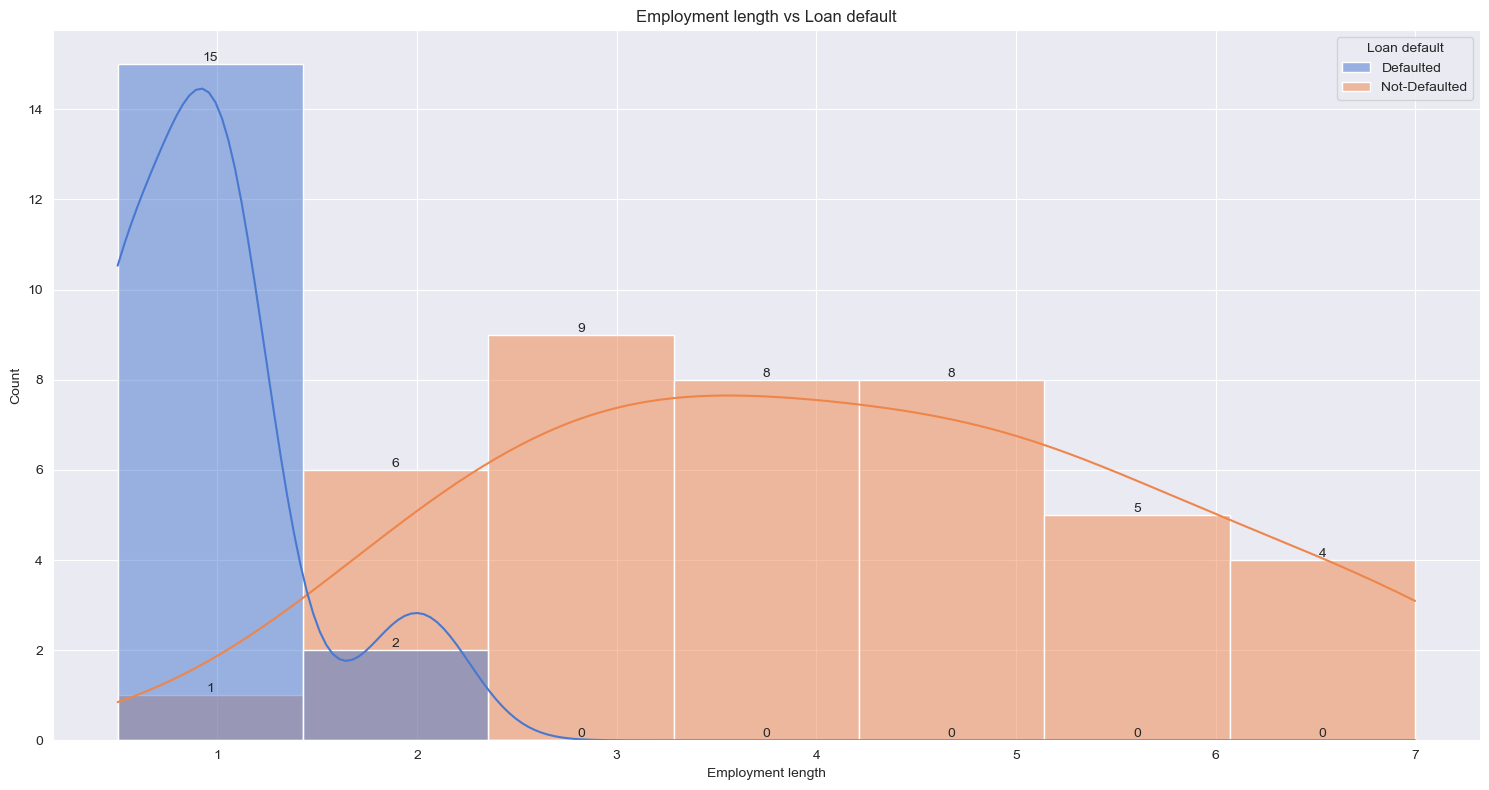

In [18]:
data_df['Employment length'] = data_df['Employment length'].replace(['6 months'],'0.5 years')
data_df['Employment length'] = data_df['Employment length'].replace('[years,year]', '', regex=True).astype(float)

plt.figure(figsize=(15,8))
ax = sns.histplot(x="Employment length", hue="Loan default", data=data_df.sort_values(by=['Employment length'],ascending=True), kde=True)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Employment length vs Loan default")
plt.tight_layout()
plt.show()

<div style="font-family:Georgia;background-color:black; padding:30px; font-size:17px">

💡Customers with less than 2 years of employment lenght were most likely to default on their loans.<br>

💡All the customers with 6 months of employment defaulted on their loan.<br>

💡We can observe that a lot of the customers had an employment length less than or equal to 1 year.<br>
</div>

##### Visualizing Feature Variable - Debt-to-income ratio

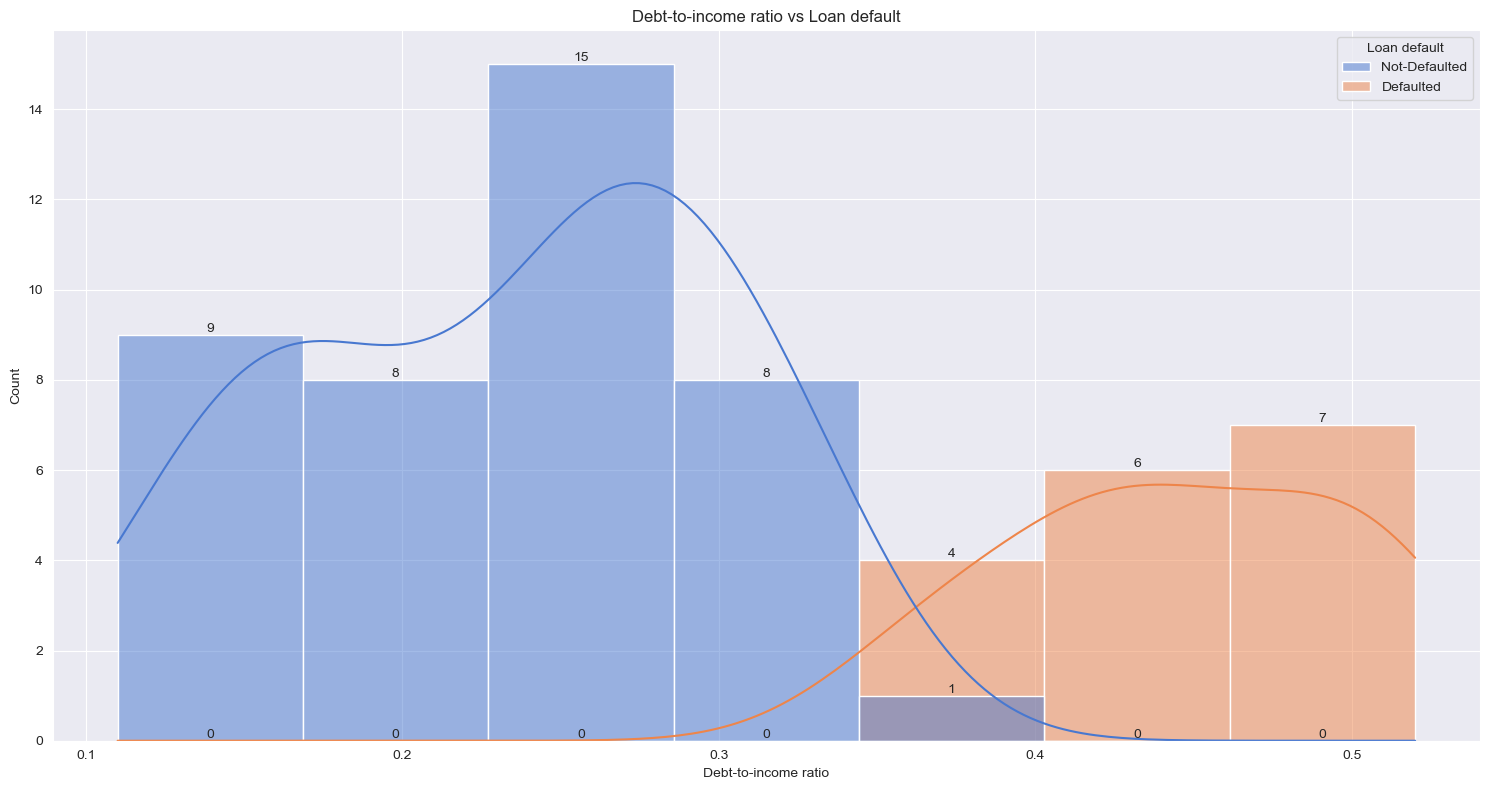

In [19]:
plt.figure(figsize=(15,8))
ax = sns.histplot(x="Debt-to-income ratio", hue="Loan default", data=data_df, kde=True)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Debt-to-income ratio vs Loan default")
plt.tight_layout()
plt.show()

<div style="font-family:Georgia;background-color:black; padding:30px; font-size:17px">

💡Customers with Debt-To-income ratio greater than 0.35 were most likely to default on their loan.<br>
</div>

##### Plotting Boxplots and Satterplots to gain more insights on the dataset

In [20]:
categorical_features = data_df.select_dtypes(include=["object"]).columns.tolist()
categorical_features.remove("Loan default")
numeric_features = data_df.select_dtypes(include=["int","float"]).columns.tolist()

print("Categorical Features:",categorical_features)
print("\n","-"*50)
print("\nNumerical Features:",numeric_features)

Categorical Features: []

 --------------------------------------------------

Numerical Features: ['Annual income', 'Credit score', 'Employment length', 'Debt-to-income ratio']


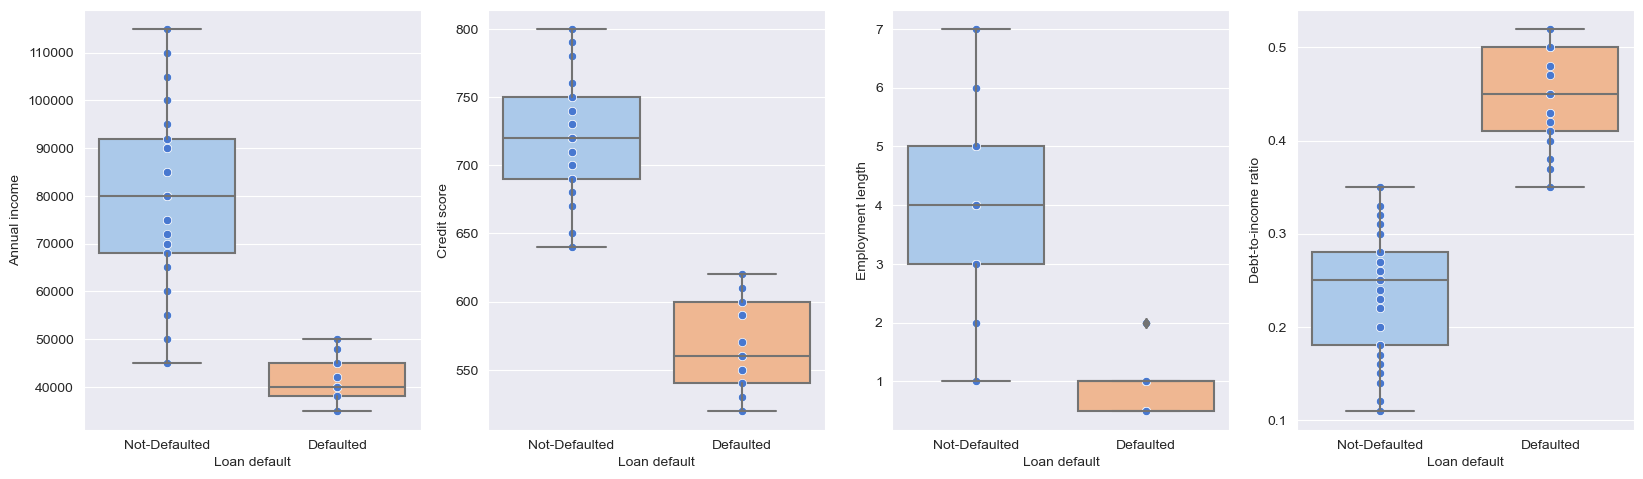

In [21]:
fig = plt.figure(figsize = (20,12))
fig.tight_layout()

for i in range(len(numeric_features)):
  column = numeric_features[i]
  sub = fig.add_subplot(2, 4, i + 1)
  sns.boxplot(x = 'Loan default', y = column, data =data_df, palette = 'pastel')
  sns.scatterplot(x = 'Loan default', y = column, data = data_df, palette = 'muted')
plt.show()

<div style="font-family:Georgia;background-color:black; padding:30px; font-size:17px">

💡The Dataset is unbalanced.<br>
</div>

##### Multivariate Analysis


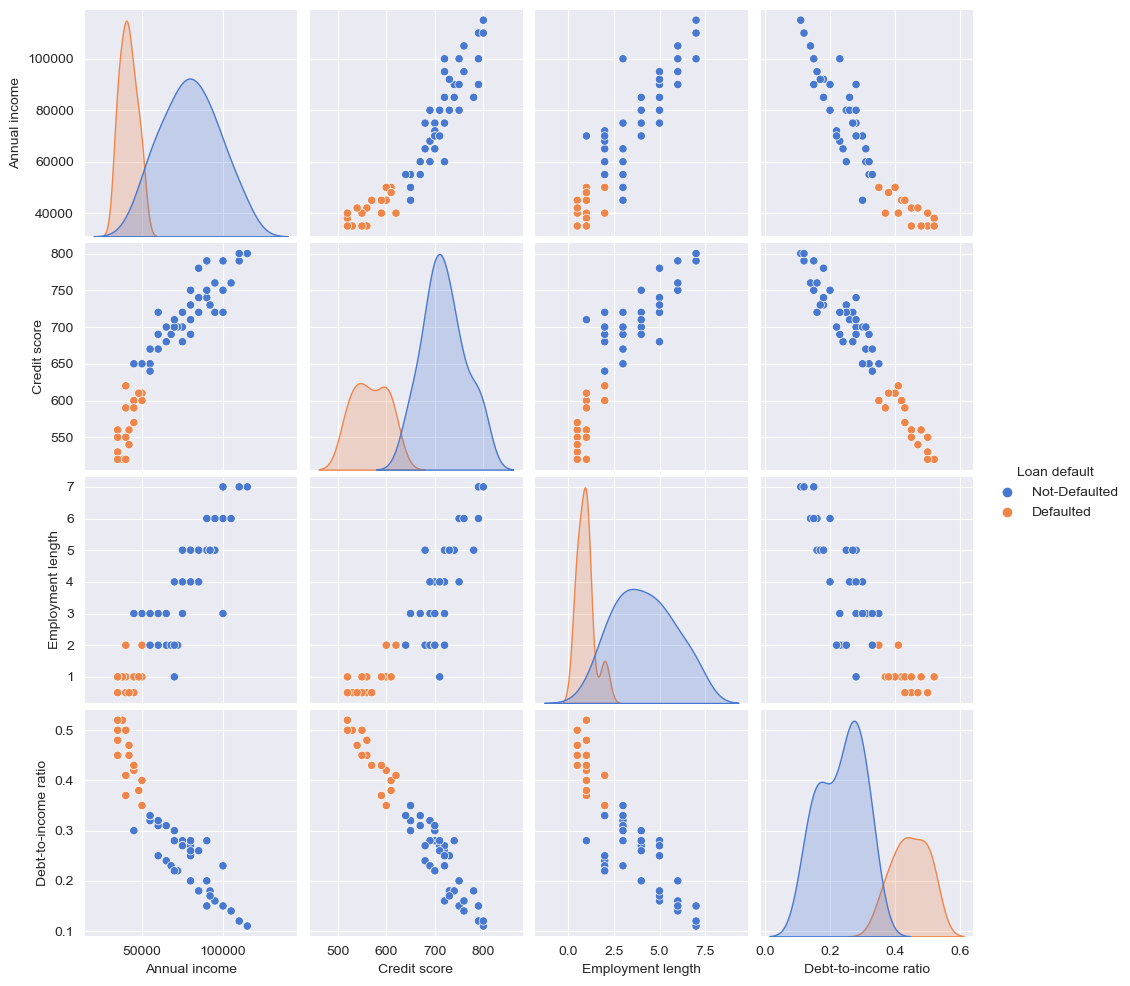

In [22]:
sns.pairplot(data_df,hue="Loan default")
plt.show()

* Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.

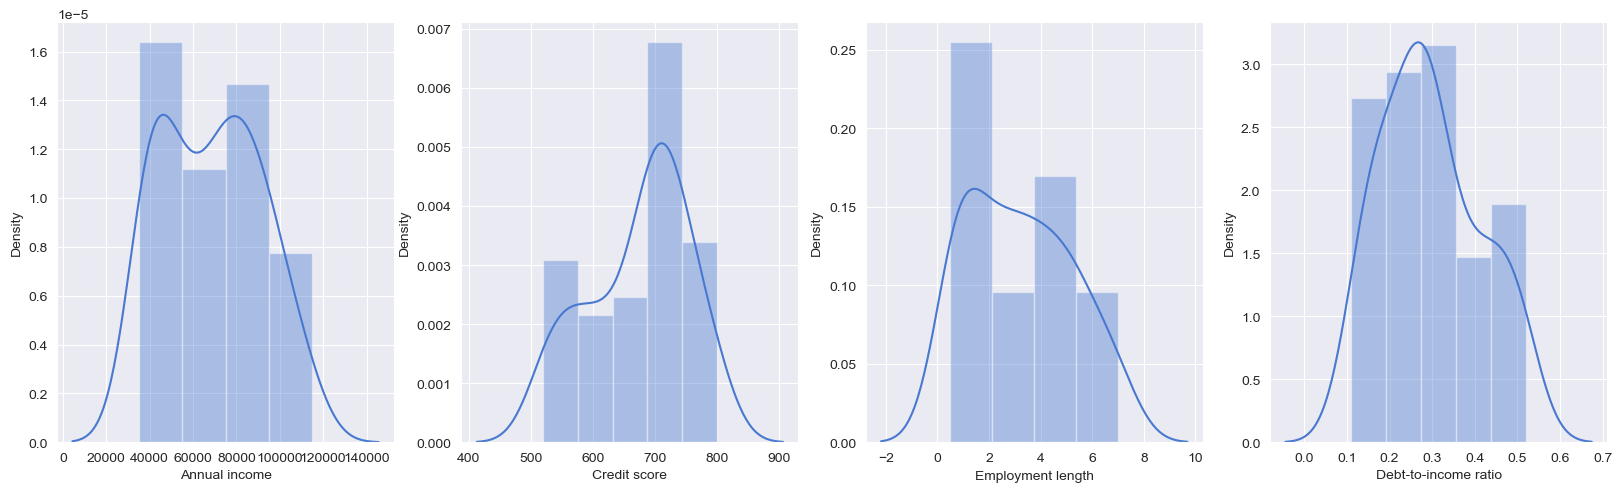

In [23]:
plt.figure(figsize=(20,12))

plt.subplot(2,4,1)
sns.distplot(data_df["Annual income"])

plt.subplot(2,4,2)
sns.distplot(data_df["Credit score"])

plt.subplot(2,4,3)
sns.distplot(data_df["Employment length"])

plt.subplot(2,4,4)
sns.distplot(data_df["Debt-to-income ratio"])

fig.tight_layout()
plt.show()

<div style="font-family:Georgia;background-color:black; padding:30px; font-size:17px">

💡We can observe that the features have kind of Normal Distribution but are highly unbalanced.<br>
</div>

In [24]:

# data_df['Employment length'].unique()
# def get_values(x):
    # if pd.notnull(x):
        # val = int(x.split(' ')[0])
        # prd = x.split(' ')[1]
        # if prd in ['month', 'months']:
            # return val / 12
        # elif prd in ['year', 'years'] : 
            # return val 
    # else:
        # return x

# data_df['Years'] = data_df.apply(lambda x:get_values#(x.Employment_length), axis=1)